Given a set of attributes for an Individual, determine if a credit line should be extended to them. 
If so, what should the repayment terms be in business recommendations?

In [529]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [530]:
#Read the data
df = pd.read_csv('logistic_regression.csv')
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [531]:
df.shape

(396030, 27)

In [532]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [533]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [534]:
df.describe(include=['O'])

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
count,396030,396030,396030,373103,377729,396030,396030,396030,396030,396030,394275,396030,396030,396030,396030
unique,2,7,35,173105,11,6,3,115,2,14,48817,684,2,3,393700
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,Oct-2000,f,INDIVIDUAL,USCGC Smith\r\nFPO AE 70466
freq,302005,116018,26655,4389,126041,198348,139563,14846,318357,234507,152472,3017,238066,395319,8


In [535]:
df=df.dropna(thresh=9)

In [536]:
df.shape

(396030, 27)

In [537]:
df['loan_status'].value_counts()

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

In [462]:
##Handling duplication of the data
df.duplicated().sum()

0

In [463]:
##Get all the column names
columns=df.columns
columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [464]:
## Check for null values present
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [465]:
## Handling missing Values

df['mort_acc'].fillna(df['mort_acc'].median(),inplace= True)
df['emp_length']=df['emp_length'].fillna(df['emp_length'].mode()[0])
df['emp_title'].fillna('other',inplace=True)
df.dropna(subset=["title"] , inplace = True)
df.dropna(subset=["pub_rec_bankruptcies"] , inplace = True)
df.dropna(subset=["revol_util"] , inplace = True)

In [466]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

In [467]:
df.shape

(393465, 27)

In [468]:
cat_data=df.select_dtypes(exclude=np.number)
cat_data

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
0,36 months,B,B4,Marketing,10+ years,RENT,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,Jun-1990,w,INDIVIDUAL,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,36 months,B,B5,Credit analyst,4 years,MORTGAGE,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,Jul-2004,f,INDIVIDUAL,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,36 months,B,B3,Statistician,< 1 year,RENT,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,Aug-2007,f,INDIVIDUAL,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,36 months,A,A2,Client Advocate,6 years,RENT,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,Sep-2006,f,INDIVIDUAL,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,60 months,C,C5,Destiny Management Inc.,9 years,MORTGAGE,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,Mar-1999,f,INDIVIDUAL,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,60 months,B,B4,licensed bankere,2 years,RENT,Source Verified,Oct-2015,Fully Paid,debt_consolidation,Debt consolidation,Nov-2004,w,INDIVIDUAL,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,36 months,C,C1,Agent,5 years,MORTGAGE,Source Verified,Feb-2015,Fully Paid,debt_consolidation,Debt consolidation,Feb-2006,f,INDIVIDUAL,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,36 months,B,B1,City Carrier,10+ years,RENT,Verified,Oct-2013,Fully Paid,debt_consolidation,pay off credit cards,Mar-1997,f,INDIVIDUAL,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,60 months,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,Verified,Aug-2012,Fully Paid,debt_consolidation,Loanforpayoff,Nov-1990,f,INDIVIDUAL,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


In [469]:
## Feature engineering for pub_rec, pub_rec_bankruptcies, mort_acc

df['pub_rec'] = df['pub_rec'].apply(lambda x: 1 if x>1.0 else 0)
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].apply(lambda x: 1 if x>1.0 else 0)
df['mort_acc'] = df['mort_acc'].apply(lambda x: 1 if x>1.0 else 0)

Fully Paid     316271
Charged Off     77194
Name: loan_status, dtype: int64


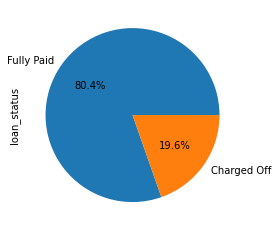

In [470]:
## Loan Status percentage
df['loan_status'].value_counts().plot(kind='pie',autopct='%1.1f%%')
print(df['loan_status'].value_counts())

In [471]:
##Ratio between fully paid and charged off
Ratio = df['loan_status'].value_counts()[0] / df['loan_status'].value_counts()[1]
Ratio

4.0970930383190405

 36 months    300024
 60 months     93441
Name: term, dtype: int64


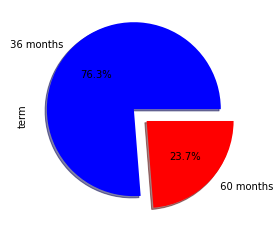

In [472]:
##Loan Period
df['term'].value_counts().plot(kind='pie',explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=['b','r'])
print(df['term'].value_counts())

d:\testautomation\python3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='term', ylabel='count'>

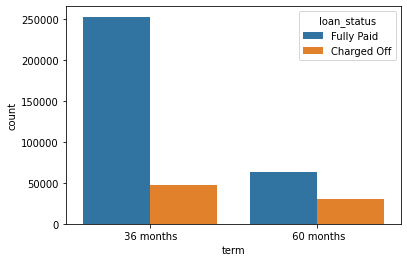

In [473]:
sns.countplot(df['term'],hue=df['loan_status'])

In [474]:
df['emp_length']=df['emp_length'].str.extract(r"(\d+)") # using reg.exp to capture one or more digits
df['emp_length'] =df['emp_length'].astype(float)
df['emp_length'].value_counts()

10.0    143346
1.0      57126
2.0      35597
3.0      31469
5.0      26353
4.0      23811
6.0      20750
7.0      20727
8.0      19071
9.0      15215
Name: emp_length, dtype: int64

d:\testautomation\python3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='emp_length', ylabel='count'>

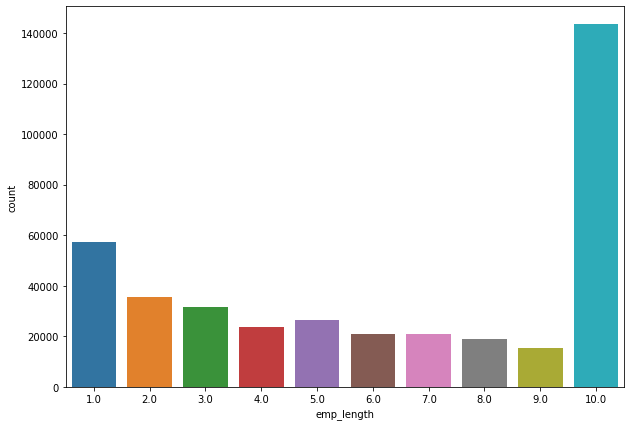

In [475]:
plt.figure(figsize = (10,7))
sns.countplot(df['emp_length'])

In [438]:
df['emp_length'].value_counts()

10.0    143436
1.0      57331
2.0      35660
3.0      31518
5.0      26377
4.0      23844
6.0      20773
7.0      20743
8.0      19090
9.0      15228
Name: emp_length, dtype: int64

 36 months    300559
 60 months     93441
Name: term, dtype: int64


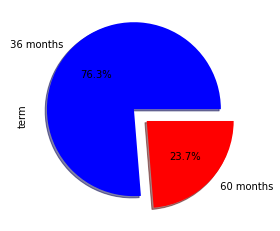

In [439]:
df['term'].value_counts().plot(kind='pie',explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=['b','r'])
print(df['term'].value_counts())

d:\testautomation\python3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='emp_length', ylabel='count'>

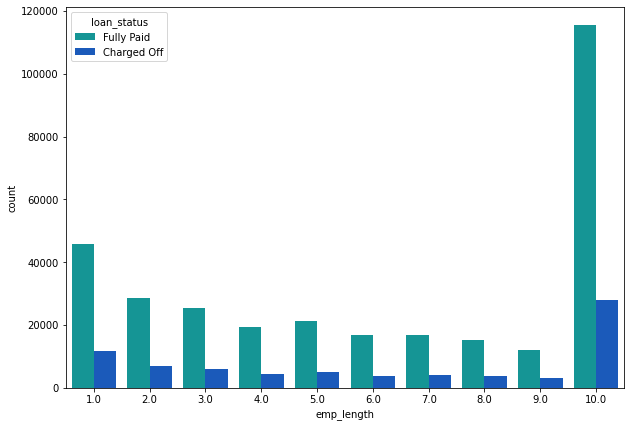

In [440]:
plt.figure(figsize=(10,7))
sns.countplot(df['emp_length'],hue=df['loan_status'],palette='winter_r')

In [441]:
df['purpose'].value_counts()

debt_consolidation    233323
credit_card            82653
home_improvement       23872
other                  21063
major_purchase          8726
small_business          5668
car                     4673
medical                 4160
moving                  2843
vacation                2436
house                   2194
wedding                 1810
renewable_energy         326
educational              253
Name: purpose, dtype: int64

Text(0.5, 1.0, 'Purpose of taking Loan')

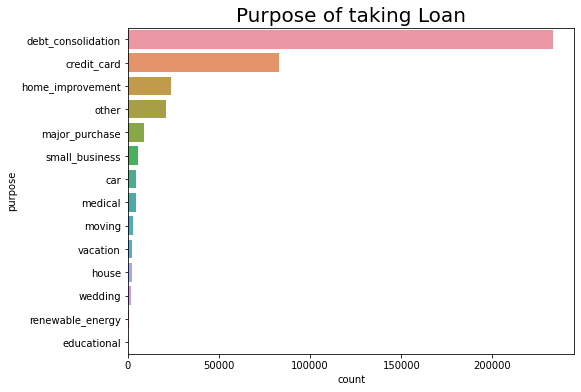

In [442]:
plt.figure(figsize=(8,6))
sns.countplot(y='purpose' , data=df, order = df['purpose'].value_counts().index)
plt.title('Purpose of taking Loan' , fontdict={'fontsize':20})

MORTGAGE    197307
RENT        159052
OWN          37497
OTHER          110
NONE            31
ANY              3
Name: home_ownership, dtype: int64


d:\testautomation\python3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='home_ownership', ylabel='count'>

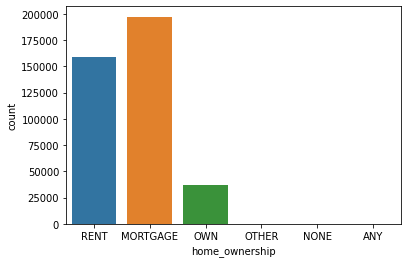

In [443]:
print(df['home_ownership'].value_counts())
sns.countplot(df['home_ownership'])

MORTGAGE    197307
RENT        159052
OWN          37497
OTHER          110
NONE            31
ANY              3
Name: home_ownership, dtype: int64


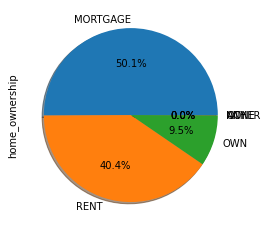

In [444]:
df['home_ownership'].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True)
print(df['home_ownership'].value_counts())

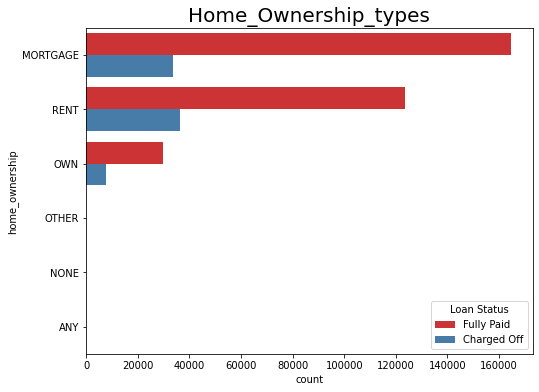

In [423]:
plt.figure(figsize=(8,6))
sns.countplot(y='home_ownership' , data=df, order = df['home_ownership'].value_counts().index,
              hue='loan_status', palette = 'Set1')
plt.title('Home_Ownership_types' , fontdict={'fontsize':20})
plt.legend(title="Loan Status", loc="lower right")

d:\testautomation\python3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='grade', ylabel='count'>

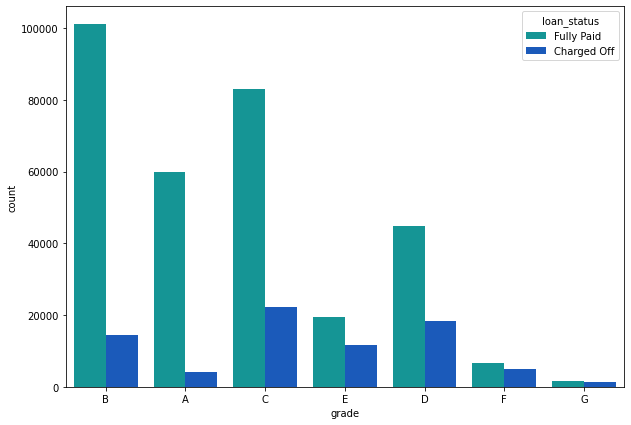

In [445]:
plt.figure(figsize=(10,7))
sns.countplot(df['grade'],hue=df['loan_status'],palette='winter_r')

In [476]:
df['emp_title'].value_counts()

other                   22668
Teacher                  4368
Manager                  4232
Registered Nurse         1841
RN                       1840
                        ...  
Belanger                    1
OMIV Supervisor             1
SVP, Technology             1
sikorsky                    1
Gracon Services, Inc        1
Name: emp_title, Length: 172227, dtype: int64

In [477]:
df['pincode'] = df['address'].apply(lambda x: x.split( )[-1])
df = df.drop(columns = 'address', axis=1)

d:\testautomation\python3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pincode', ylabel='count'>

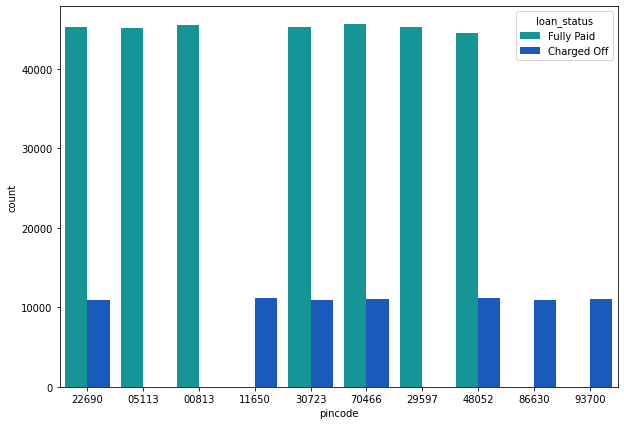

In [478]:
plt.figure(figsize=(10,7))
sns.countplot(df['pincode'],hue=df['loan_status'],palette='winter_r')

In [479]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,pincode
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10.0,RENT,117000.0,...,16.0,0,36369.0,41.8,25.0,w,INDIVIDUAL,0,0,22690
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4.0,MORTGAGE,65000.0,...,17.0,0,20131.0,53.3,27.0,f,INDIVIDUAL,1,0,05113
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,1.0,RENT,43057.0,...,13.0,0,11987.0,92.2,26.0,f,INDIVIDUAL,0,0,05113
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6.0,RENT,54000.0,...,6.0,0,5472.0,21.5,13.0,f,INDIVIDUAL,0,0,00813
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9.0,MORTGAGE,55000.0,...,13.0,0,24584.0,69.8,43.0,f,INDIVIDUAL,0,0,11650


In [450]:
# ## Convert catagorical features to numeric
# df['term'] = df['term'].apply(lambda x: 36 if x==' 36 months' else 60)
# df['issue_d'] = df['issue_d'].apply(lambda x: x.split('-')[-1]).astype(int)
# df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda x: x.split('-')[-1]).astype(int)
# df['loan_status'] = df['loan_status'].apply(lambda x: 0 if x == 'Charged Off' else 1)
# df['initial_list_status'] = df['initial_list_status'].apply(lambda x: 0 if x == 'f' else 1)
# df['application_type'] = df['application_type'].apply(lambda x: 0 if x == 'f' else 1)

In [480]:
## Encoding to convert categorical features to numeric
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cat_data = df.select_dtypes(exclude=np.number).columns

for col in cat_data:
    df[col]=le.fit_transform(df[col])

<AxesSubplot:>

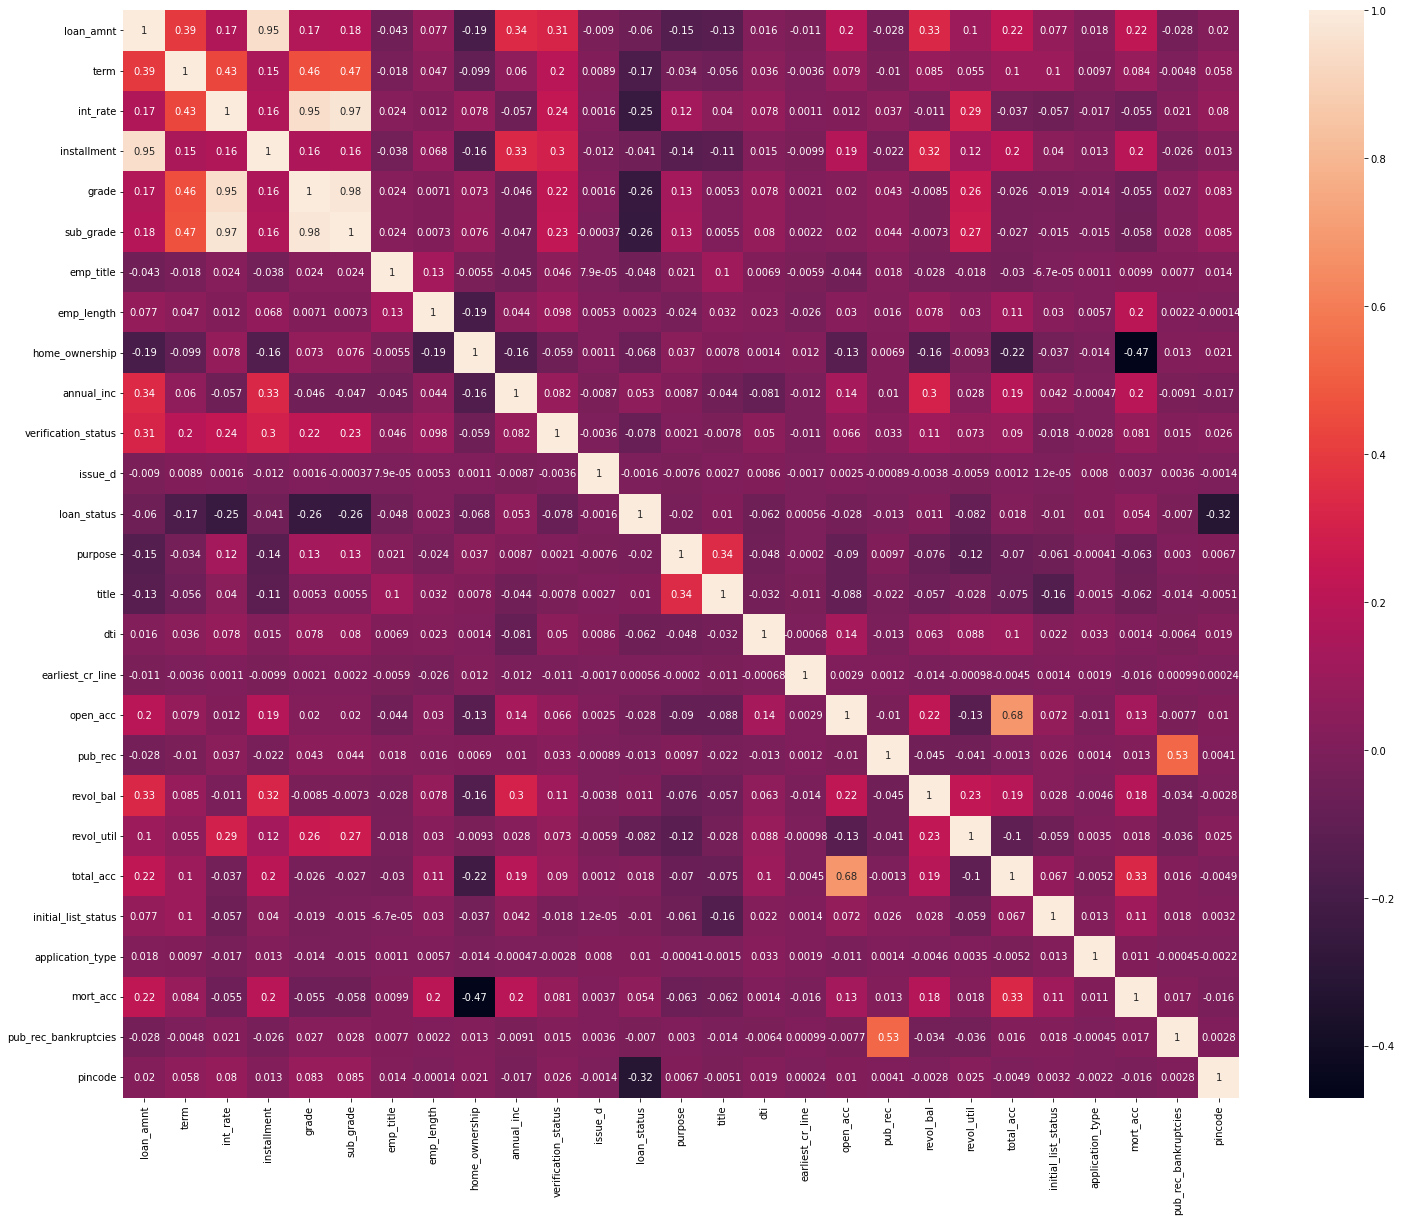

In [481]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(), annot= True)

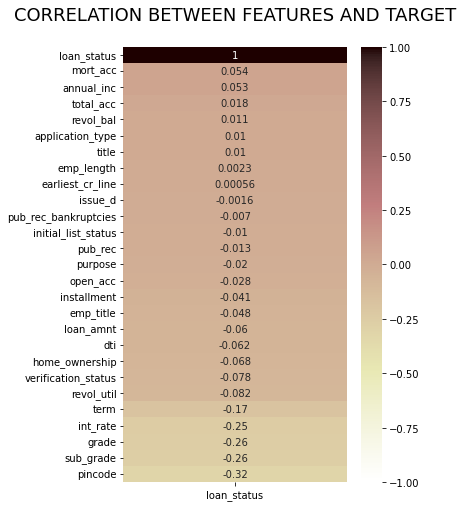

In [482]:
plt.figure(figsize=(5, 8))
heatmap = sns.heatmap(df.corr()[['loan_status']].sort_values(
    by='loan_status',ascending=False),
                      vmin=-1, vmax=1, annot=True,
                      cmap = 'pink_r')
plt.title('CORRELATION BETWEEN FEATURES AND TARGET\n', loc='center', fontsize=18);
plt.show()

In [486]:
num_col=list(df.columns)
def cut(df,feature):
        q1 = df[feature].quantile(.25)
        q3 = df[feature].quantile(.75)
        iqr = q3 - q1
        upper_bound_nmmarried=q3+(1.5*iqr)
        
        lower_bound_nmarried=q1-(1.5*iqr)
        df1=df[df[feature]>lower_bound_nmarried]
        df1=df[df[feature]<upper_bound_nmmarried]
        return df1
df_without= df.copy()

for i in num_col:
    print(i)
    op = cut(df_without,i)

loan_amnt
term
int_rate
installment
grade
sub_grade
emp_title
emp_length
home_ownership
annual_inc
verification_status
issue_d
loan_status
purpose
title
dti
earliest_cr_line
open_acc
pub_rec
revol_bal
revol_util
total_acc
initial_list_status
application_type
mort_acc
pub_rec_bankruptcies
pincode


In [487]:
#Multicollinearity check by VIF score (variables are dropped one-by-one till none has VIF>10) (10 Points)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X_t = op

vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
# 
vif

,Features,VIF
0,loan_amnt,226.67
2,int_rate,218.86
3,installment,203.52
5,sub_grade,166.25
23,application_type,83.05
4,grade,64.53
21,total_acc,11.96
17,open_acc,11.90
1,term,8.80
20,revol_util,7.53


In [488]:

col_to_drop=['loan_amnt']
for i in col_to_drop:
    op.drop(i,axis=1,inplace=True)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X_t = op

vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
# 
vif

,Features,VIF
1,int_rate,214.27
4,sub_grade,166.19
22,application_type,80.69
3,grade,64.52
20,total_acc,11.96
16,open_acc,11.90
19,revol_util,7.53
11,loan_status,6.07
2,installment,5.52
13,title,4.57


In [489]:
col_to_drop=['int_rate']
for i in col_to_drop:
    op.drop(i,axis=1,inplace=True)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X_t = op

vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
# 
vif

,Features,VIF
3,sub_grade,88.87
2,grade,64.52
21,application_type,51.21
19,total_acc,11.95
15,open_acc,11.87
18,revol_util,7.37
10,loan_status,6.05
1,installment,5.51
12,title,4.45
5,emp_length,4.44


In [491]:
col_to_drop=['sub_grade','grade','application_type','total_acc','open_acc']
for i in col_to_drop:
    op.drop(i,axis=1,inplace=True)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X_t = op

vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
# 
vif

,Features,VIF
15,revol_util,5.67
1,installment,5.12
8,loan_status,4.61
10,title,4.25
3,emp_length,4.23
2,emp_title,4.15
7,issue_d,4.00
12,earliest_cr_line,3.94
4,home_ownership,3.70
19,pincode,3.57


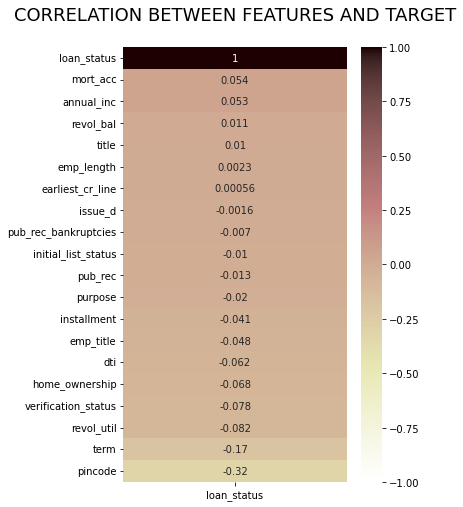

In [494]:
plt.figure(figsize=(5, 8))
heatmap = sns.heatmap(op.corr()[['loan_status']].sort_values(
    by='loan_status',ascending=False),
                      vmin=-1, vmax=1, annot=True,
                      cmap = 'pink_r')
plt.title('CORRELATION BETWEEN FEATURES AND TARGET\n', loc='center', fontsize=18);
plt.show()

In [495]:
X = df.drop(['loan_status'],axis=1)
y = df["loan_status"]

In [496]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state= 42)

In [497]:
y_train.shape

(314772,)

In [498]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.fit_transform(X_test)

In [499]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train , y_train)

LogisticRegression()

In [500]:
print(lr.score(x_train , y_train))
print(lr.score(x_test , y_test))

0.8338638760753816
0.8231863062788304


In [501]:
y_pred = lr.predict(X_test)

d:\testautomation\python3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [502]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix # 2D np array

array([[ 7262,  8462],
       [24444, 38525]], dtype=int64)

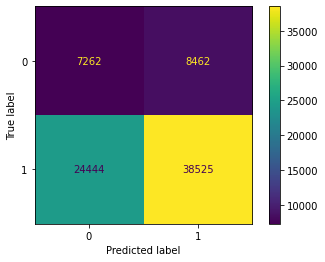

In [503]:
ConfusionMatrixDisplay(conf_matrix).plot()

In [504]:
y_test.shape

(78693,)

In [505]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.8199076340264329

In [506]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.6118089853737554

In [507]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.7007348393903016

In [514]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smt = SMOTE()
X_sm, y_sm = smt.fit_resample(x_train, y_train)

print('Resampled dataset shape {}'.format(Counter(y_sm)))

Resampled dataset shape Counter({0: 253302, 1: 253302})


In [515]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_sm,y_sm, test_size=0.2,random_state= 42)

In [516]:
lr.fit(X_train1 , y_train1)

LogisticRegression()

In [517]:
print(lr.score(X_train1 , y_train1))
print(lr.score(X_test1 , y_test1))

0.7148831803949339
0.7166234048222975


In [518]:
y_pred1 = lr.predict(X_test1)

In [519]:
conf_mat2 = confusion_matrix(y_true=y_test1, y_pred=y_pred1)
conf_mat2

array([[36335, 14175],
       [14537, 36274]], dtype=int64)

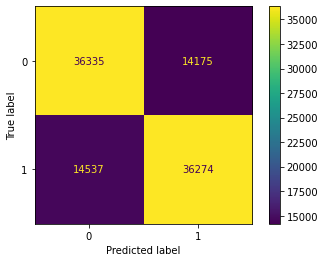

In [520]:
ConfusionMatrixDisplay(conf_mat2).plot()

In [521]:
recall=recall_score(y_test1, y_pred1, average='weighted')
recall

0.7166234048222975

In [522]:
preciosn=precision_score(y_test1, y_pred1, average='weighted')
preciosn

0.716640481321904

In [523]:
y_proba = lr.predict_proba(X_test1)
y_proba = y_proba[:, 1]

In [524]:
y_proba

array([0.37547667, 0.68295892, 0.30308775, ..., 0.66200735, 0.25444429,
       0.27201358])

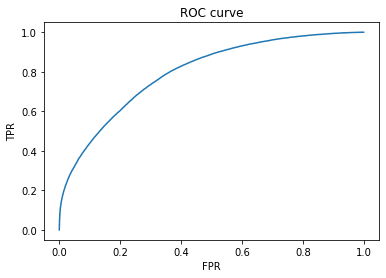

In [525]:
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt

fpr, tpr, thr = roc_curve(y_test1, y_proba)

plt.plot(fpr,tpr)
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [528]:

roc_auc_score(y_test1, y_proba)

0.7967452836785011

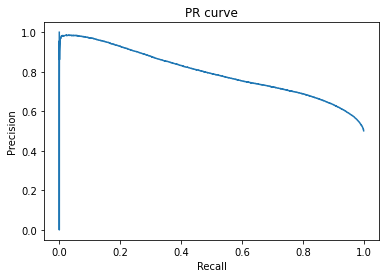

In [526]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
precision, recall, thr = precision_recall_curve(y_test1, y_proba)

plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
plt.show()